<a href="https://colab.research.google.com/github/HyunJW/Log_Analystic/blob/lee_feat/%EB%85%B8%EC%9D%B8%EB%B6%84%EC%84%9D%EC%8B%9C%EA%B0%81%ED%99%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [870]:
import pandas as pd
import numpy as np
import matplotlib as mpl
#`7-21



In [871]:
def fix_font():
  import os
  import matplotlib as mpl
  import matplotlib.pyplot as plt
  os.system("apt-get install -y fonts-nanum")
  os.system("fc-cache -fv")
  mpl.font_manager._rebuild()
  findfont=mpl.font_manager.fontManager.findfont
  mpl.font_manager.findfont=findfont
  mpl.backends.backend_agg.findfont=findfont
  plt.rcParams["font.family"]="NanumBarunGothic"
  plt.rcParams["axes.unicode_minus"] = False


fix_font()

In [872]:
dfsub=pd.read_csv("/content/무임승차_대상별_현황_2016-2021.csv", encoding="cp949")

In [873]:
dfho=pd.read_csv("/content/서울시 지하철 호선별 역별 유_무임 승하차 인원 정보.csv", encoding="cp949")

In [874]:
dfho

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,작업일자
0,202212,1호선,서울역,1350791,196523,1316828,187268,20230103
1,202212,1호선,시청,672846,96623,665583,93198,20230103
2,202212,1호선,종각,975925,150911,949944,141309,20230103
3,202212,1호선,종로3가,490967,309071,450017,287432,20230103
4,202212,1호선,종로5가,476315,247835,470710,238588,20230103
...,...,...,...,...,...,...,...,...
57389,201501,9호선,노량진,817907,864989,114416,119275,20150206
57390,201501,9호선,사평,70919,67069,14085,13931,20150206
57391,201501,9호선,노들,121496,100670,27470,25964,20150206
57392,201501,9호선,가양,469127,439698,107695,104082,20150206


In [875]:
dfsub

,운영기관별(1),2016,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,2016.8,...,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
0,운영기관별(1),계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,...,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타
1,운영기관별(1),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),...,무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원)
2,합계,431540,564065,345012,450692,80733,105766,5500,7233,296,...,380197,510236,315412,423193,60463,81260,3855,5168,467,615
3,서울교통공사,-,-,-,-,-,-,-,-,-,...,205748,278438,170771,231108,32868,44477,2109,2853,-,-
4,서울메트로,151738,206478,121979,165984,27736,37741,2023,2753,-,...,-,-,-,-,-,-,-,-,-,-
5,서울특별시 도시철도공사,102912,139184,81162,109756,20278,27436,1473,1992,-,...,-,-,-,-,-,-,-,-,-,-
6,서울메트로 9호선(주),12037,15045,9337,11671,2534,3167,166,207,-,...,10682,13352,8655,10819,1877,2346,133,166,17,21
7,서울교통공사9호선운영부문,1233,1544,987,1234,226,283,18,23,2,...,3789,4736,3118,3897,485,606,186,233,-,-
8,부산교통공사,87557,111118,72059,91450,14535,18446,963,1222,-,...,80009,109034,67718,92284,11502,15675,789,1075,0,0
9,대구도시철도공사,40725,44831,33297,36654,7034,7743,394,434,-,...,36742,45927,30933,38666,5540,6924,269,337,0,0


In [876]:
dfsub = dfsub.replace({'-': None}, regex=True)

In [877]:
dfsub.columns

Index(['운영기관별(1)', '2016', '2016.1', '2016.2', '2016.3', '2016.4', '2016.5',
       '2016.6', '2016.7', '2016.8', '2016.9', '2017', '2017.1', '2017.2',
       '2017.3', '2017.4', '2017.5', '2017.6', '2017.7', '2017.8', '2017.9',
       '2018', '2018.1', '2018.2', '2018.3', '2018.4', '2018.5', '2018.6',
       '2018.7', '2018.8', '2018.9', '2019', '2019.1', '2019.2', '2019.3',
       '2019.4', '2019.5', '2019.6', '2019.7', '2019.8', '2019.9', '2020',
       '2020.1', '2020.2', '2020.3', '2020.4', '2020.5', '2020.6', '2020.7',
       '2020.8', '2020.9', '2021', '2021.1', '2021.2', '2021.3', '2021.4',
       '2021.5', '2021.6', '2021.7', '2021.8', '2021.9'],
      dtype='object')

In [878]:
dfsub

,운영기관별(1),2016,2016.1,2016.2,2016.3,2016.4,2016.5,2016.6,2016.7,2016.8,...,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9
0,운영기관별(1),계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,...,계,계,노인,노인,장애인,장애인,국가유공자,국가유공자,기타,기타
1,운영기관별(1),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),...,무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원),무임승차 (천명),무임비용 (백만원)
2,합계,431540,564065,345012,450692,80733,105766,5500,7233,296,...,380197,510236,315412,423193,60463,81260,3855,5168,467,615
3,서울교통공사,None,None,None,None,None,None,None,None,None,...,205748,278438,170771,231108,32868,44477,2109,2853,None,None
4,서울메트로,151738,206478,121979,165984,27736,37741,2023,2753,None,...,None,None,None,None,None,None,None,None,None,None
5,서울특별시 도시철도공사,102912,139184,81162,109756,20278,27436,1473,1992,None,...,None,None,None,None,None,None,None,None,None,None
6,서울메트로 9호선(주),12037,15045,9337,11671,2534,3167,166,207,None,...,10682,13352,8655,10819,1877,2346,133,166,17,21
7,서울교통공사9호선운영부문,1233,1544,987,1234,226,283,18,23,2,...,3789,4736,3118,3897,485,606,186,233,None,None
8,부산교통공사,87557,111118,72059,91450,14535,18446,963,1222,None,...,80009,109034,67718,92284,11502,15675,789,1075,0,0
9,대구도시철도공사,40725,44831,33297,36654,7034,7743,394,434,None,...,36742,45927,30933,38666,5540,6924,269,337,0,0


In [879]:
dfsub.rename(columns = {'운영기관별(1)':'운영기관별'}, inplace = True)

In [880]:
df_total_pop=dfsub[["운영기관별","2017","2018","2019","2020","2021"]]

In [881]:
df_total_pop["2017"][2:3]=int(df_total_pop["2017"].iloc[3])+int(df_total_pop["2017"].iloc[6])+int(df_total_pop["2017"].iloc[7])+int(df_total_pop["2017"].iloc[8])+int(df_total_pop["2017"].iloc[9])+int(df_total_pop["2017"].iloc[10])+int(df_total_pop["2017"].iloc[11])+int(df_total_pop["2017"].iloc[12])+int(df_total_pop["2017"].iloc[13])+int(df_total_pop["2017"].iloc[14])+int(df_total_pop["2017"].iloc[15])+int(df_total_pop["2017"].iloc[16])

/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:1105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._set_values(indexer, value)
<ipython-input-881-23c93677e606>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_pop["2017"][2:3]=int(df_total_pop["2017"].iloc[3])+int(df_total_pop["2017"].iloc[6])+int(df_total_pop["2017"].iloc[7])+int(df_total_pop["2017"].iloc[8])+int(df_total_pop["2017"].iloc[9])+int(df_total_pop["2017"].iloc[10])+int(df_total_pop["2017"].iloc[11])+int(df_total_pop["2017"].iloc[12])+int(df_total_pop["2017"].iloc[13])+int(df_total_pop["2017"].iloc[14])+int(df_total_pop["20

In [882]:
df_total_pop

,운영기관별,2017,2018,2019,2020,2021
0,운영기관별(1),계,계,계,계,계
1,운영기관별(1),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명)
2,합계,452783,465831,497095,358371,380197
3,서울교통공사,258250,261047,273841,195690,205748
4,서울메트로,None,None,None,None,None
5,서울특별시 도시철도공사,None,None,None,None,None
6,서울메트로 9호선(주),12440,12824,13750,9900,10682
7,서울교통공사9호선운영부문,1350,1668,4319,3353,3789
8,부산교통공사,93418,95673,102235,76634,80009
9,대구도시철도공사,43796,45559,49140,33314,36742


In [883]:
df_old_pop=dfsub[["운영기관별","2016.2","2017.2","2018.2","2019.2","2020.2","2021.2"]]

In [884]:
df_old_pop["2017.2"][2:3]=int(df_old_pop["2017.2"].iloc[3])+int(df_old_pop["2017.2"].iloc[6])+int(df_old_pop["2017.2"].iloc[7])+int(df_old_pop["2017.2"].iloc[8])+int(df_old_pop["2017.2"].iloc[9])+int(df_old_pop["2017.2"].iloc[10])+int(df_old_pop["2017.2"].iloc[11])+int(df_old_pop["2017.2"].iloc[12])+int(df_old_pop["2017.2"].iloc[14])+int(df_old_pop["2017.2"].iloc[15])+int(df_old_pop["2017.2"].iloc[16])

/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:1105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._set_values(indexer, value)
<ipython-input-884-8f6e08f9d154>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old_pop["2017.2"][2:3]=int(df_old_pop["2017.2"].iloc[3])+int(df_old_pop["2017.2"].iloc[6])+int(df_old_pop["2017.2"].iloc[7])+int(df_old_pop["2017.2"].iloc[8])+int(df_old_pop["2017.2"].iloc[9])+int(df_old_pop["2017.2"].iloc[10])+int(df_old_pop["2017.2"].iloc[11])+int(df_old_pop["2017.2"].iloc[12])+int(df_old_pop["2017.2"].iloc[14])+int(df_old_pop["2017.2"].iloc[15])+int(df_old_pop["2017

In [885]:
df_old_pop

,운영기관별,2016.2,2017.2,2018.2,2019.2,2020.2,2021.2
0,운영기관별(1),노인,노인,노인,노인,노인,노인
1,운영기관별(1),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명)
2,합계,345012,366191,380263,408946,293476,315412
3,서울교통공사,None,208466,212843,225094,160053,170771
4,서울메트로,121979,None,None,None,None,None
5,서울특별시 도시철도공사,81162,None,None,None,None,None
6,서울메트로 9호선(주),9337,9746,10156,11024,7863,8655
7,서울교통공사9호선운영부문,987,1103,1387,3559,2724,3118
8,부산교통공사,72059,77631,79920,85759,64212,67718
9,대구도시철도공사,33297,36211,37933,41228,27784,30933


In [886]:
df_disab_pop=dfsub[["운영기관별","2016.4","2017.4","2018.4","2019.4","2020.4","2021.4"]]

In [887]:
df_disab_pop["2017.4"][2:3]=int(df_disab_pop["2017.4"].iloc[3])+int(df_disab_pop["2017.4"].iloc[6])+int(df_disab_pop["2017.4"].iloc[7])+int(df_disab_pop["2017.4"].iloc[8])+int(df_disab_pop["2017.4"].iloc[9])+int(df_disab_pop["2017.4"].iloc[10])+int(df_disab_pop["2017.4"].iloc[11])+int(df_disab_pop["2017.4"].iloc[12])+int(df_disab_pop["2017.4"].iloc[13])+int(df_disab_pop["2017.4"].iloc[14])+int(df_disab_pop["2017.4"].iloc[15])+int(df_disab_pop["2017.4"].iloc[16])

/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:1105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._set_values(indexer, value)
<ipython-input-887-45e14172f015>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_disab_pop["2017.4"][2:3]=int(df_disab_pop["2017.4"].iloc[3])+int(df_disab_pop["2017.4"].iloc[6])+int(df_disab_pop["2017.4"].iloc[7])+int(df_disab_pop["2017.4"].iloc[8])+int(df_disab_pop["2017.4"].iloc[9])+int(df_disab_pop["2017.4"].iloc[10])+int(df_disab_pop["2017.4"].iloc[11])+int(df_disab_pop["2017.4"].iloc[12])+int(df_disab_pop["2017.4"].iloc[13])+int(df_disab_pop["2017.4"].iloc[14]

In [888]:
df_disab_pop

,운영기관별,2016.4,2017.4,2018.4,2019.4,2020.4,2021.4
0,운영기관별(1),장애인,장애인,장애인,장애인,장애인,장애인
1,운영기관별(1),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명)
2,합계,80733,80854,79858,82325,60612,60463
3,서울교통공사,None,46405,44967,45644,33460,32868
4,서울메트로,27736,None,None,None,None,None
5,서울특별시 도시철도공사,20278,None,None,None,None,None
6,서울메트로 9호선(주),2534,2529,2508,2546,1888,1877
7,서울교통공사9호선운영부문,226,228,252,580,459,485
8,부산교통공사,14535,14854,14717,15374,11611,11502
9,대구도시철도공사,7034,7180,7224,7509,5268,5540


In [889]:
df_honour_pop=dfsub[["운영기관별","2016.6","2017.6","2018.6","2019.6","2020.6","2021.6"]]

In [890]:
df_honour_pop["2017.6"][2:3]=int(df_honour_pop["2017.6"].iloc[3])+int(df_honour_pop["2017.6"].iloc[6])+int(df_honour_pop["2017.6"].iloc[7])+int(df_honour_pop["2017.6"].iloc[8])+int(df_honour_pop["2017.6"].iloc[9])+int(df_honour_pop["2017.6"].iloc[10])+int(df_honour_pop["2017.6"].iloc[11])+int(df_honour_pop["2017.6"].iloc[12])+int(df_honour_pop["2017.6"].iloc[13])+int(df_honour_pop["2017.6"].iloc[14])+int(df_honour_pop["2017.6"].iloc[15])+int(df_honour_pop["2017.6"].iloc[16])

/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:1105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._set_values(indexer, value)
<ipython-input-890-d1ba4fef9f0a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_honour_pop["2017.6"][2:3]=int(df_honour_pop["2017.6"].iloc[3])+int(df_honour_pop["2017.6"].iloc[6])+int(df_honour_pop["2017.6"].iloc[7])+int(df_honour_pop["2017.6"].iloc[8])+int(df_honour_pop["2017.6"].iloc[9])+int(df_honour_pop["2017.6"].iloc[10])+int(df_honour_pop["2017.6"].iloc[11])+int(df_honour_pop["2017.6"].iloc[12])+int(df_honour_pop["2017.6"].iloc[13])+int(df_honour_pop["2017.6

In [891]:
df_honour_pop

,운영기관별,2016.6,2017.6,2018.6,2019.6,2020.6,2021.6
0,운영기관별(1),국가유공자,국가유공자,국가유공자,국가유공자,국가유공자,국가유공자
1,운영기관별(1),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명)
2,합계,5500,5422,5392,5497,3918,3855
3,서울교통공사,None,3379,3237,3103,2177,2109
4,서울메트로,2023,None,None,None,None,None
5,서울특별시 도시철도공사,1473,None,None,None,None,None
6,서울메트로 9호선(주),166,165,160,180,133,133
7,서울교통공사9호선운영부문,18,19,29,180,170,186
8,부산교통공사,963,934,1036,1102,811,789
9,대구도시철도공사,394,405,402,403,262,269


In [892]:
df_other_pop=dfsub[["운영기관별","2016.8","2017.8","2018.8","2019.8","2020.8","2021.8"]]

In [893]:
df_other_pop

,운영기관별,2016.8,2017.8,2018.8,2019.8,2020.8,2021.8
0,운영기관별(1),기타,기타,기타,기타,기타,기타
1,운영기관별(1),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명)
2,합계,296,None,318,327,365,467
3,서울교통공사,None,None,None,None,None,None
4,서울메트로,None,None,None,None,None,None
5,서울특별시 도시철도공사,None,None,None,None,None,None
6,서울메트로 9호선(주),None,None,None,None,16,17
7,서울교통공사9호선운영부문,2,None,None,None,None,None
8,부산교통공사,None,None,None,None,None,0
9,대구도시철도공사,None,None,None,None,None,0


In [894]:
df_other_pop["2017.8"][2:3]=int(df_other_pop["2017.8"].iloc[12])+int(df_other_pop["2017.8"].iloc[14])+int(df_other_pop["2017.8"].iloc[15])+int(df_other_pop["2017.8"].iloc[16])

/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:1105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._set_values(indexer, value)
<ipython-input-894-c1d3d82c60bb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other_pop["2017.8"][2:3]=int(df_other_pop["2017.8"].iloc[12])+int(df_other_pop["2017.8"].iloc[14])+int(df_other_pop["2017.8"].iloc[15])+int(df_other_pop["2017.8"].iloc[16])


In [895]:
df_other_pop

,운영기관별,2016.8,2017.8,2018.8,2019.8,2020.8,2021.8
0,운영기관별(1),기타,기타,기타,기타,기타,기타
1,운영기관별(1),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명),무임승차 (천명)
2,합계,296,317,318,327,365,467
3,서울교통공사,None,None,None,None,None,None
4,서울메트로,None,None,None,None,None,None
5,서울특별시 도시철도공사,None,None,None,None,None,None
6,서울메트로 9호선(주),None,None,None,None,16,17
7,서울교통공사9호선운영부문,2,None,None,None,None,None
8,부산교통공사,None,None,None,None,None,0
9,대구도시철도공사,None,None,None,None,None,0


In [896]:
df_total_pop_tot=df_total_pop[2:3]
df_total_pop_tot[df_total_pop_tot["운영기관별"]=="합계"]
df_total_pop_tot.columns=["대상자","2017","2018","2019","2020","2021"]
df_total_pop_tot["대상자"]="전체"
df_total_pop_tot

<ipython-input-896-33af70efb15a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_pop_tot["대상자"]="전체"


,대상자,2017,2018,2019,2020,2021
2,전체,452783,465831,497095,358371,380197


In [897]:
df_old_pop_tot=df_old_pop[2:3]
df_old_pop_tot[df_old_pop_tot["운영기관별"]=="합계"]
df_old_pop_tot.columns=["대상자","2016","2017","2018","2019","2020","2021"]
df_old_pop_tot["대상자"]="노인"
df_old_pop_tot

<ipython-input-897-d2bbfb7cbdc3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_old_pop_tot["대상자"]="노인"


,대상자,2016,2017,2018,2019,2020,2021
2,노인,345012,366191,380263,408946,293476,315412


In [898]:
df_disab_pop_tot=df_disab_pop[2:3]
df_disab_pop_tot[df_disab_pop_tot["운영기관별"]=="합계"]
df_disab_pop_tot.columns=["대상자","2016","2017","2018","2019","2020","2021"]
df_disab_pop_tot["대상자"]="장애인"
df_disab_pop_tot

<ipython-input-898-93b6762844a4>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_disab_pop_tot["대상자"]="장애인"


,대상자,2016,2017,2018,2019,2020,2021
2,장애인,80733,80854,79858,82325,60612,60463


In [899]:
df_honour_pop_tot=df_honour_pop[2:3]
df_honour_pop_tot[df_honour_pop_tot["운영기관별"]=="합계"]
df_honour_pop_tot.columns=["대상자","2016","2017","2018","2019","2020","2021"]
df_honour_pop_tot["대상자"]="유공자"
df_honour_pop_tot

<ipython-input-899-136e9d442f6c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_honour_pop_tot["대상자"]="유공자"


,대상자,2016,2017,2018,2019,2020,2021
2,유공자,5500,5422,5392,5497,3918,3855


In [900]:
df_other_pop_tot=df_other_pop[2:3]
df_other_pop_tot[df_other_pop_tot["운영기관별"]=="합계"]
df_other_pop_tot.columns=["대상자","2016","2017","2018","2019","2020","2021"]
df_other_pop_tot["대상자"]="기타"
df_other_pop_tot

<ipython-input-900-52033b007d20>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_other_pop_tot["대상자"]="기타"


,대상자,2016,2017,2018,2019,2020,2021
2,기타,296,317,318,327,365,467


In [901]:
newdf=pd.concat([df_total_pop_tot,df_old_pop_tot,df_disab_pop_tot, df_honour_pop_tot,df_other_pop_tot], ignore_index=True)
newdf.set_index("대상자", inplace=True)
newdf

,2017,2018,2019,2020,2021,2016
대상자,,,,,,
전체,452783,465831,497095,358371,380197,NaN
노인,366191,380263,408946,293476,315412,345012
장애인,80854,79858,82325,60612,60463,80733
유공자,5422,5392,5497,3918,3855,5500
기타,317,318,327,365,467,296


In [902]:
newdf=newdf.drop(columns=['2016'])

In [903]:
newdf.astype("int")

,2017,2018,2019,2020,2021
대상자,,,,,
전체,452783,465831,497095,358371,380197
노인,366191,380263,408946,293476,315412
장애인,80854,79858,82325,60612,60463
유공자,5422,5392,5497,3918,3855
기타,317,318,327,365,467


In [1046]:
newchart=newdf[1:]

In [904]:
total=newdf.iloc[0][0:].values.tolist()
old=newdf.iloc[1][0:].values.tolist()
disabled=newdf.iloc[2][0:].values.tolist()
honored=newdf.iloc[3][0:].values.tolist()
others=newdf.iloc[4][0:].values.tolist()

In [905]:
total = [ int(x) for x in total ]
old = [ int(x) for x in old ]
disabled = [ int(x) for x in disabled ]
honored = [ int(x) for x in honored ]
others = [ int(x) for x in others ]

In [906]:
total

[452783, 465831, 497095, 358371, 380197]

In [907]:
old

[366191, 380263, 408946, 293476, 315412]

In [908]:
disabled

[80854, 79858, 82325, 60612, 60463]

In [909]:
honored

[5422, 5392, 5497, 3918, 3855]

In [910]:
others

[317, 318, 327, 365, 467]

In [911]:
totallist=newdf[:1]
totallist

,2017,2018,2019,2020,2021
대상자,,,,,
전체,452783,465831,497095,358371,380197


In [912]:
# importing package
import matplotlib.pyplot as plt
import numpy as np

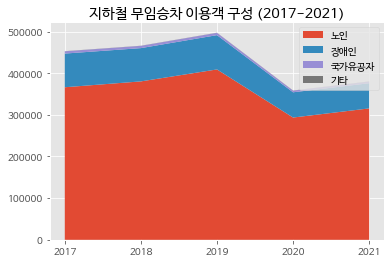

In [1040]:
# plot bars in stack manner
plt.style.use('ggplot')
x = ["2017", "2018", "2019", "2020", "2021"]
y1 = total
y2 = old
y3 = disabled
y4 = honored
y5 = others
y = np.vstack([y2, y3, y4,y5])

# plot
fig, ax = plt.subplots()

ax.stackplot(x, y)
# plt.annotate("annotate",(2.2,0.5))

plt.legend(('노인','장애인','국가유공자','기타'))
plt.title('지하철 무임승차 이용객 구성 (2017-2021)')



plt.show()

In [1086]:
newchart=newchart.transpose()
newchart

,2017,2018,2019,2020,2021
대상자,,,,,
노인,366191,380263,408946,293476,315412
장애인,80854,79858,82325,60612,60463
유공자,5422,5392,5497,3918,3855
기타,317,318,327,365,467


Text(0.5, 1.0, '지하철 무임승차 이용객 구성 (2017-2021)')

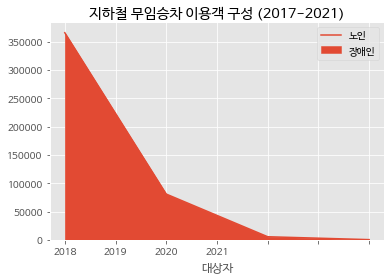

In [1087]:
x = ["2017", "2018", "2019", "2020", "2021"]
y = np.vstack(newchart)

ax = newchart.plot.area(stacked=True)



ax.set_xticklabels(["2017", "2018", "2019", "2020", "2021"])

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=8)
plt.xticks(rotation = 0)

plt.legend(['노인','장애인','국가유공자','기타'], loc='upper right')
plt.title('지하철 무임승차 이용객 구성 (2017-2021)')




In [1064]:
dfho.drop(dfho.loc[dfho['호선명']=="9호선2~3단계"].index, inplace=True)
dfho.drop(dfho.loc[dfho['호선명']=='9호선2단계'].index, inplace=True)
dfho

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,작업일자
0,202212,1호선,서울역,1350791,196523,1316828,187268,20230103
1,202212,1호선,시청,672846,96623,665583,93198,20230103
2,202212,1호선,종각,975925,150911,949944,141309,20230103
3,202212,1호선,종로3가,490967,309071,450017,287432,20230103
4,202212,1호선,종로5가,476315,247835,470710,238588,20230103
...,...,...,...,...,...,...,...,...
57389,201501,9호선,노량진,817907,864989,114416,119275,20150206
57390,201501,9호선,사평,70919,67069,14085,13931,20150206
57391,201501,9호선,노들,121496,100670,27470,25964,20150206
57392,201501,9호선,가양,469127,439698,107695,104082,20150206


In [915]:
dfho["사용월"].unique()

array([202212, 202211, 202210, 202209, 202208, 202207, 202206, 202205,
       202204, 202203, 202202, 202201, 202112, 202111, 202110, 202109,
       202108, 202107, 202106, 202105, 202104, 202103, 202102, 202101,
       202012, 202011, 202010, 202009, 202008, 202007, 202006, 202005,
       202004, 202003, 202002, 202001, 201912, 201911, 201910, 201909,
       201908, 201907, 201906, 201905, 201904, 201903, 201902, 201901,
       201812, 201811, 201810, 201809, 201808, 201807, 201806, 201805,
       201804, 201803, 201802, 201801, 201712, 201711, 201710, 201709,
       201708, 201707, 201706, 201705, 201704, 201703, 201702, 201701,
       201612, 201611, 201610, 201609, 201608, 201607, 201606, 201605,
       201604, 201603, 201602, 201601, 201512, 201511, 201510, 201509,
       201508, 201507, 201506, 201505, 201504, 201503, 201502, 201501])

In [916]:
dfho202212=dfho[dfho["사용월"]==202212]
dfho202212

,사용월,호선명,지하철역,유임승차인원,무임승차인원,유임하차인원,무임하차인원,작업일자
0,202212,1호선,서울역,1350791,196523,1316828,187268,20230103
1,202212,1호선,시청,672846,96623,665583,93198,20230103
2,202212,1호선,종각,975925,150911,949944,141309,20230103
3,202212,1호선,종로3가,490967,309071,450017,287432,20230103
4,202212,1호선,종로5가,476315,247835,470710,238588,20230103
...,...,...,...,...,...,...,...,...
608,202212,중앙선,오빈,4989,3852,4895,3850,20230103
609,202212,중앙선,양평,60083,27799,60883,28334,20230103
610,202212,중앙선,원덕,5210,5171,4891,4935,20230103
611,202212,중앙선,용문,28824,26184,29709,26318,20230103


In [917]:
dfho.호선명.unique()

array(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선',
       '경강선', '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선', '과천선', '분당선',
       '수인선', '신림선', '안산선', '우이신설선', '일산선', '장항선', '중앙선'], dtype=object)

In [918]:
yoo=dfho.pivot_table(index ="사용월",
                       columns ="호선명",
                       values="유임승차인원",
                       aggfunc ="sum",
                       margins=True)

In [919]:
moo=dfho.pivot_table(index ="사용월",
                       columns ="호선명",
                       values="무임승차인원",
                       aggfunc ="sum",
                       margins=True)

In [920]:
yoo

호선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,경강선,...,과천선,분당선,수인선,신림선,안산선,우이신설선,일산선,장항선,중앙선,All
사용월,,,,,,,,,,,,,,,,,,,,,
201501,7061728.0,4.156686e+07,1.405046e+07,1.510658e+07,1.458390e+07,8239130.0,1.837736e+07,3932104.0,6621245.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,129539372
201502,6049221.0,3.556570e+07,1.216569e+07,1.312456e+07,1.250432e+07,7123746.0,1.586349e+07,3383307.0,5641118.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,111421149
201503,7045187.0,4.413479e+07,1.500149e+07,1.675065e+07,1.585773e+07,9417641.0,2.025682e+07,4329797.0,7088629.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139882739
201504,6756467.0,4.270963e+07,1.464972e+07,1.636467e+07,1.581772e+07,9212033.0,1.977901e+07,4292558.0,7958350.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137540161
201505,6793349.0,4.194809e+07,1.451490e+07,1.645744e+07,1.528910e+07,9308495.0,1.939606e+07,4204366.0,7547910.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135459705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202209,4580938.0,3.280496e+07,1.174236e+07,1.107715e+07,1.429360e+07,7824760.0,1.365684e+07,4088730.0,6544956.0,786911.0,...,2371546.0,8506784.0,1411181.0,742971.0,2976630.0,880727.0,2357568.0,429356.0,2116586.0,157238112
202210,5016726.0,3.476239e+07,1.255854e+07,1.190929e+07,1.505100e+07,8349283.0,1.407360e+07,4338108.0,6865051.0,823523.0,...,2579510.0,8868232.0,1492473.0,807925.0,3118413.0,919282.0,2493604.0,438133.0,2209653.0,166217439
202211,5033249.0,3.525118e+07,1.263427e+07,1.202378e+07,1.518271e+07,8075618.0,1.443465e+07,4415543.0,7004420.0,821691.0,...,2500993.0,9029056.0,1460453.0,837165.0,3075153.0,923051.0,2457708.0,437019.0,2181518.0,166975877


In [921]:
yoo_month=pd.DataFrame(yoo.All)
yoo_month["연도"]=[2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,
                 2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,
                 2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,
                 2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,
                 2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,
                 2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,
                 2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,
                 2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,
                 ""]
yoo_month.reset_index(inplace=True)
yoo_month.set_index("연도", inplace=True)


In [922]:
yoo_month.rename(columns = {'All':'유임승차'}, inplace = True)
yoo_month

,사용월,유임승차
연도,,
2015,201501,129539372
2015,201502,111421149
2015,201503,139882739
2015,201504,137540161
2015,201505,135459705
...,...,...
2022,202209,157238112
2022,202210,166217439
2022,202211,166975877


In [923]:
yoo.ho=yoo.iloc[96:]
yoo.ho

<ipython-input-923-fa14a15e6be8>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  yoo.ho=yoo.iloc[96:]


호선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,경강선,...,과천선,분당선,수인선,신림선,안산선,우이신설선,일산선,장항선,중앙선,All
사용월,,,,,,,,,,,,,,,,,,,,,
All,551550094.0,3.715756e+09,1.291679e+09,1.331388e+09,1.430004e+09,818610998.0,1.684307e+09,419787367.0,655676329.0,52656670.0,...,243744100.0,807985188.0,100797321.0,5538047.0,295614716.0,53352778.0,227559840.0,30867707.0,200241870.0,16716441122


In [924]:
moo_month=pd.DataFrame(moo.All)
moo_month["연도"]=[2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,2015,
                 2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,2016,
                 2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,
                 2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,
                 2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,
                 2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,
                 2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,
                 2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022,
                 ""]
moo_month.reset_index(inplace=True)
moo_month.set_index("연도", inplace=True)
moo_month.rename(columns = {'All':'무임승차'}, inplace = True)
moo_month

,사용월,무임승차
연도,,
2015,201501,129258016
2015,201502,111164477
2015,201503,139689950
2015,201504,137364173
2015,201505,135375585
...,...,...
2022,202209,32672797
2022,202210,35929494
2022,202211,34461837


In [925]:
moo.ho=moo.iloc[96:]
moo.ho

<ipython-input-925-906caa91a0ed>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  moo.ho=moo.iloc[96:]


호선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,경강선,...,과천선,분당선,수인선,신림선,안산선,우이신설선,일산선,장항선,중앙선,All
사용월,,,,,,,,,,,,,,,,,,,,,
All,244149418.0,871187547.0,379722046.0,395123233.0,417084867.0,237520002.0,455491233.0,126591864.0,163756216.0,9614634.0,...,55999960.0,195538358.0,28472123.0,1961596.0,61959441.0,26076832.0,73910145.0,10795737.0,67786934.0,4541677637


In [926]:
yearlyyoomoo=pd.merge(yoo_month, moo_month) # column bind

In [927]:
yearlyyoomoo["사용월"]=[1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12,1,2,3,4,5,6,7,8,9,10,11,12, ""]

In [928]:
yearlyyoomoo

,사용월,유임승차,무임승차
0,1,129539372,129258016
1,2,111421149,111164477
2,3,139882739,139689950
3,4,137540161,137364173
4,5,135459705,135375585
...,...,...,...
92,9,157238112,32672797
93,10,166217439,35929494
94,11,166975877,34461837
95,12,169187573,33882130


In [929]:
a=yearlyyoomoo[["유임승차"]][24:84].sum().values.tolist()

In [930]:
b=yearlyyoomoo[["무임승차"]][24:84].sum().values.tolist()

In [931]:
listforpie=a+b

In [932]:
listforpie

[10221794195, 1950966787]

In [933]:
yearlyyoomoo=yearlyyoomoo[:][24:84]

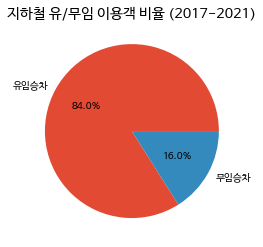

In [934]:
y = np.array(listforpie)
mylabels = ["유임승차","무임승차"]
plt.title('지하철 유/무임 이용객 비율 (2017-2021)')
plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.show() 

In [935]:
yearlyyoomoo["연도"]=[2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,2017,
                 2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,2018,
                 2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,2019,
                 2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,2020,
                 2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021,2021
                 ]

In [936]:
yearlyyoomoo

,사용월,유임승차,무임승차,연도
24,1,174339519,30080083,2017
25,2,173026918,30816832,2017
26,3,199940101,36020298,2017
27,4,191507411,35117503,2017
28,5,191121529,35568482,2017
29,6,185106633,35031556,2017
30,7,180344854,33258730,2017
31,8,178859514,33721284,2017
32,9,190799132,36212982,2017
33,10,173610309,33565036,2017


In [937]:
yearlyyoomoo.reset_index()

yearlyyoomoo=yearlyyoomoo.set_index("연도")
yearlyyoomoo

,사용월,유임승차,무임승차
연도,,,
2017,1,174339519,30080083
2017,2,173026918,30816832
2017,3,199940101,36020298
2017,4,191507411,35117503
2017,5,191121529,35568482
2017,6,185106633,35031556
2017,7,180344854,33258730
2017,8,178859514,33721284
2017,9,190799132,36212982


In [938]:
yearlyyoomoonew=yearlyyoomoo.drop(['사용월'], axis=1)
yearlyyoomoonew.reset_index(inplace=True)
yearlyyoomoonew

,연도,유임승차,무임승차
0,2017,174339519,30080083
1,2017,173026918,30816832
2,2017,199940101,36020298
3,2017,191507411,35117503
4,2017,191121529,35568482
5,2017,185106633,35031556
6,2017,180344854,33258730
7,2017,178859514,33721284
8,2017,190799132,36212982
9,2017,173610309,33565036


In [939]:
yearlyyoomoonewnew=yearlyyoomoonew.groupby(by=["연도"]).sum()
yearlyyoomoonewnew

,유임승차,무임승차
연도,,
2017,2223982775,408423307
2018,2428262528,452645346
2019,2288897153,446469612
2020,1631307974,312026888
2021,1649343765,331401634


In [940]:
yearlyyoomoo
yearlyyoomoo2=yearlyyoomoo.reset_index()
yearlyyoomoo3=yearlyyoomoo2.drop(['연도'], axis=1)
yearlyyoomoo4=yearlyyoomoo3.drop(['사용월'], axis=1)
yearlyyoomoo4.iloc[0]

유임승차    174339519
무임승차     30080083
Name: 0, dtype: int64

In [941]:
yearlyyoomoo4.iloc[0].tolist()

[174339519, 30080083]

In [942]:
#연도별 유/무임 이용객 비율
yoonum=yearlyyoomoo["유임승차"][:70].values.tolist()
moonum=yearlyyoomoo["무임승차"][:70].values.tolist()

In [943]:
yearlyyoomoonewnew

,유임승차,무임승차
연도,,
2017,2223982775,408423307
2018,2428262528,452645346
2019,2288897153,446469612
2020,1631307974,312026888
2021,1649343765,331401634


In [944]:
yearlyyoomoonewnew["무임승차비율"]=(yearlyyoomoonewnew["무임승차"]/(yearlyyoomoonewnew["유임승차"]+yearlyyoomoonewnew["무임승차"])*100).round(1)
yearlyyoomoonewnew["유임승차비율"]=(yearlyyoomoonewnew["유임승차"]/(yearlyyoomoonewnew["유임승차"]+yearlyyoomoonewnew["무임승차"])*100).round(1)


In [945]:
yearlyyoomoonewnew

,유임승차,무임승차,무임승차비율,유임승차비율
연도,,,,
2017,2223982775,408423307,15.5,84.5
2018,2428262528,452645346,15.7,84.3
2019,2288897153,446469612,16.3,83.7
2020,1631307974,312026888,16.1,83.9
2021,1649343765,331401634,16.7,83.3


In [946]:
yearlyyoomoonewnew.reset_index(inplace=True)

forplotting=yearlyyoomoonewnew
forplotting

,연도,유임승차,무임승차,무임승차비율,유임승차비율
0,2017,2223982775,408423307,15.5,84.5
1,2018,2428262528,452645346,15.7,84.3
2,2019,2288897153,446469612,16.3,83.7
3,2020,1631307974,312026888,16.1,83.9
4,2021,1649343765,331401634,16.7,83.3


In [947]:
forplotting1=forplotting[["유임승차","무임승차"]]
forplotting2=forplotting[["연도","유임승차비율","무임승차비율"]]
forplotting2.set_index(["연도"], inplace=True)

In [948]:
y3=yearlyyoomoonewnew["무임승차비율"]
y4=yearlyyoomoonewnew["유임승차비율"]

In [949]:
y1=yearlyyoomoonewnew["유임승차"]

# y1=y1.values.tolist()
y2=yearlyyoomoonewnew["무임승차"]
# y2=y2.values.tolist()

In [950]:
y3

0    15.5
1    15.7
2    16.3
3    16.1
4    16.7
Name: 무임승차비율, dtype: float64

In [951]:
y4

0    84.5
1    84.3
2    83.7
3    83.9
4    83.3
Name: 유임승차비율, dtype: float64

In [952]:
y5=y1/100000000
y6=y2/100000000

In [953]:
y5=y5.round(1)
y5

0    22.2
1    24.3
2    22.9
3    16.3
4    16.5
Name: 유임승차, dtype: float64

In [954]:
y6=y6.round(1)
y6

0    4.1
1    4.5
2    4.5
3    3.1
4    3.3
Name: 무임승차, dtype: float64

In [955]:
yearlyyoomoonewnew['유임승차억'] = y5
yearlyyoomoonewnew['무임승차억'] = y6

yearlyyoomoonewnew

,연도,유임승차,무임승차,무임승차비율,유임승차비율,유임승차억,무임승차억
0,2017,2223982775,408423307,15.5,84.5,22.2,4.1
1,2018,2428262528,452645346,15.7,84.3,24.3,4.5
2,2019,2288897153,446469612,16.3,83.7,22.9,4.5
3,2020,1631307974,312026888,16.1,83.9,16.3,3.1
4,2021,1649343765,331401634,16.7,83.3,16.5,3.3


In [956]:
y1


0    2223982775
1    2428262528
2    2288897153
3    1631307974
4    1649343765
Name: 유임승차, dtype: int64

In [957]:
y2

0    408423307
1    452645346
2    446469612
3    312026888
4    331401634
Name: 무임승차, dtype: int64

In [958]:
y1

0    2223982775
1    2428262528
2    2288897153
3    1631307974
4    1649343765
Name: 유임승차, dtype: int64

In [959]:
for p in y4:
  print(p)

84.5
84.3
83.7
83.9
83.3


In [960]:
import matplotlib.pyplot as plt
import seaborn as sns
from past.builtins import map
import matplotlib.patches as mpatches

# # create data
# plt.style.use('ggplot')

# x = ['2017', '2018',"2019","2020","2021"]


# plt.title('지하철 유/무임승차 이용객 연도별 추이 (2017-2021)')
# # plot bars in stack manner
# ax=plt.bar(x, y5,  label="유임승차")
# bx=plt.bar(x, y6, bottom=y5, label="무임승차")

# # cx=plt.bar(x, y4,  label="유임승차")
# # dx=plt.bar(x, y3, bottom=y4, label="무임승차")
# # ex=plt.bar(x, y2, label="무임승차")


# # plt.annotate("annotate",(2.2,0.5))

# for rect in ax:
#   height1=rect.get_height()
#   plt.text(rect.get_x()+
# rect.get_width()/2, height1, '{:.1f} (억)'.format(height1), ha="center", va="top")

# for rect in bx:
#   height2=rect.get_height()
#   plt.text(rect.get_x()+
# rect.get_width()/2, height1+height2, '{:.1f} (억)'.format(height2), ha="center", va="top")



# # for roct in bx:
# #     height2=roct.get_height()
# #     plt.text(roct.get_x()+
# # roct.get_width()/2, height2, " % height, ha="center", va="top")


# # plt.annotate("annotate",(2.2,0.5))



# plt.legend(['유임승차', '무임승차'])



# plt.show()

Text(0.5, 1.0, '지하철 유/무임승차 이용객 연도별 추이 (2017-2021)')

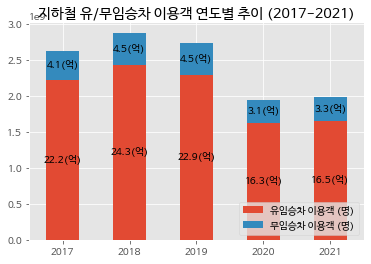

In [961]:
ax = yearlyyoomoonewnew[["유임승차","무임승차"]].plot.bar(stacked=True)
ax.set_xticklabels(['2017', '2018',"2019","2020","2021"])

x = ['2017', '2018',"2019","2020","2021"]

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}(억)'.format(height/100000000), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.xticks(rotation = 0)

plt.legend(['유임승차 이용객 (명)',"무임승차 이용객 (명)"], loc='lower right')
plt.title('지하철 유/무임승차 이용객 연도별 추이 (2017-2021)')



Text(0.5, 1.0, '지하철 유/무임승차 이용객 비율 (2017-2021)')

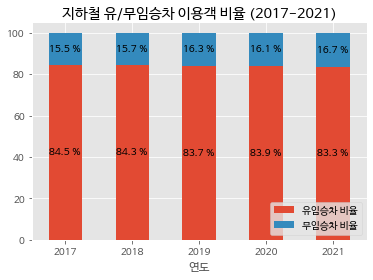

In [962]:
ax = forplotting2.plot.bar(stacked=True)
x = ['2017', '2018',"2019","2020","2021"]

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.xticks(rotation = 0)
plt.legend(['유임승차 비율',"무임승차 비율"], loc='lower right')
plt.title('지하철 유/무임승차 이용객 비율 (2017-2021)')



In [963]:
yooh=yoo.ho

In [964]:
yooh

호선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,경강선,...,과천선,분당선,수인선,신림선,안산선,우이신설선,일산선,장항선,중앙선,All
사용월,,,,,,,,,,,,,,,,,,,,,
All,551550094.0,3.715756e+09,1.291679e+09,1.331388e+09,1.430004e+09,818610998.0,1.684307e+09,419787367.0,655676329.0,52656670.0,...,243744100.0,807985188.0,100797321.0,5538047.0,295614716.0,53352778.0,227559840.0,30867707.0,200241870.0,16716441122


In [965]:
mooh=moo.ho

In [966]:
mooh

호선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,경강선,...,과천선,분당선,수인선,신림선,안산선,우이신설선,일산선,장항선,중앙선,All
사용월,,,,,,,,,,,,,,,,,,,,,
All,244149418.0,871187547.0,379722046.0,395123233.0,417084867.0,237520002.0,455491233.0,126591864.0,163756216.0,9614634.0,...,55999960.0,195538358.0,28472123.0,1961596.0,61959441.0,26076832.0,73910145.0,10795737.0,67786934.0,4541677637


In [967]:
hodf = pd.concat([yooh,mooh])
hodf

호선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,경강선,...,과천선,분당선,수인선,신림선,안산선,우이신설선,일산선,장항선,중앙선,All
사용월,,,,,,,,,,,,,,,,,,,,,
All,551550094.0,3.715756e+09,1.291679e+09,1.331388e+09,1.430004e+09,818610998.0,1.684307e+09,419787367.0,655676329.0,52656670.0,...,243744100.0,807985188.0,100797321.0,5538047.0,295614716.0,53352778.0,227559840.0,30867707.0,200241870.0,16716441122
All,244149418.0,8.711875e+08,3.797220e+08,3.951232e+08,4.170849e+08,237520002.0,4.554912e+08,126591864.0,163756216.0,9614634.0,...,55999960.0,195538358.0,28472123.0,1961596.0,61959441.0,26076832.0,73910145.0,10795737.0,67786934.0,4541677637


In [968]:
hodf.reset_index(drop=True, inplace=True)
hodf=hodf.transpose()
hodf

,0,1
호선명,,
1호선,5.515501e+08,2.441494e+08
2호선,3.715756e+09,8.711875e+08
3호선,1.291679e+09,3.797220e+08
4호선,1.331388e+09,3.951232e+08
5호선,1.430004e+09,4.170849e+08
6호선,8.186110e+08,2.375200e+08
7호선,1.684307e+09,4.554912e+08
8호선,4.197874e+08,1.265919e+08
9호선,6.556763e+08,1.637562e+08


In [969]:
hodf=hodf[:-1]

In [970]:
hodf

,0,1
호선명,,
1호선,5.515501e+08,244149418.0
2호선,3.715756e+09,871187547.0
3호선,1.291679e+09,379722046.0
4호선,1.331388e+09,395123233.0
5호선,1.430004e+09,417084867.0
6호선,8.186110e+08,237520002.0
7호선,1.684307e+09,455491233.0
8호선,4.197874e+08,126591864.0
9호선,6.556763e+08,163756216.0


In [971]:
hodf.iloc[:][0]

호선명
1호선         5.515501e+08
2호선         3.715756e+09
3호선         1.291679e+09
4호선         1.331388e+09
5호선         1.430004e+09
6호선         8.186110e+08
7호선         1.684307e+09
8호선         4.197874e+08
9호선         6.556763e+08
경강선         5.265667e+07
경부선         1.113434e+09
경원선         4.380562e+08
경의선         2.305126e+08
경인선         6.911721e+08
경춘선         7.845344e+07
공항철도 1호선    2.476959e+08
과천선         2.437441e+08
분당선         8.079852e+08
수인선         1.007973e+08
신림선         5.538047e+06
안산선         2.956147e+08
우이신설선       5.335278e+07
일산선         2.275598e+08
장항선         3.086771e+07
중앙선         2.002419e+08
Name: 0, dtype: float64

In [972]:
hodf.iloc[:][1]

호선명
1호선         244149418.0
2호선         871187547.0
3호선         379722046.0
4호선         395123233.0
5호선         417084867.0
6호선         237520002.0
7호선         455491233.0
8호선         126591864.0
9호선         163756216.0
경강선           9614634.0
경부선         240064748.0
경원선         166068814.0
경의선          60205576.0
경인선         190133302.0
경춘선          29411447.0
공항철도 1호선     33051564.0
과천선          55999960.0
분당선         195538358.0
수인선          28472123.0
신림선           1961596.0
안산선          61959441.0
우이신설선        26076832.0
일산선          73910145.0
장항선          10795737.0
중앙선          67786934.0
Name: 1, dtype: float64

In [973]:
hodf.iloc[:][0]+hodf.iloc[:][1]

호선명
1호선         7.956995e+08
2호선         4.586944e+09
3호선         1.671401e+09
4호선         1.726511e+09
5호선         1.847089e+09
6호선         1.056131e+09
7호선         2.139798e+09
8호선         5.463792e+08
9호선         8.194325e+08
경강선         6.227130e+07
경부선         1.353499e+09
경원선         6.041250e+08
경의선         2.907182e+08
경인선         8.813054e+08
경춘선         1.078649e+08
공항철도 1호선    2.807474e+08
과천선         2.997441e+08
분당선         1.003524e+09
수인선         1.292694e+08
신림선         7.499643e+06
안산선         3.575742e+08
우이신설선       7.942961e+07
일산선         3.014700e+08
장항선         4.166344e+07
중앙선         2.680288e+08
dtype: float64

In [974]:
hodf["무임승차비율"]=hodf.iloc[:][1]/(hodf.iloc[:][0]+hodf.iloc[:][1])*100

<ipython-input-974-9043b469bca0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hodf["무임승차비율"]=hodf.iloc[:][1]/(hodf.iloc[:][0]+hodf.iloc[:][1])*100


In [975]:
hodf["유임승차비율"]=hodf.iloc[:][0]/(hodf.iloc[:][0]+hodf.iloc[:][1])*100

<ipython-input-975-46c7abf154f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hodf["유임승차비율"]=hodf.iloc[:][0]/(hodf.iloc[:][0]+hodf.iloc[:][1])*100


In [976]:
hodf

,0,1,무임승차비율,유임승차비율
호선명,,,,
1호선,5.515501e+08,244149418.0,30.683620,69.316380
2호선,3.715756e+09,871187547.0,18.992768,81.007232
3호선,1.291679e+09,379722046.0,22.718789,77.281211
4호선,1.331388e+09,395123233.0,22.885651,77.114349
5호선,1.430004e+09,417084867.0,22.580655,77.419345
6호선,8.186110e+08,237520002.0,22.489635,77.510365
7호선,1.684307e+09,455491233.0,21.286645,78.713355
8호선,4.197874e+08,126591864.0,23.169231,76.830769
9호선,6.556763e+08,163756216.0,19.984100,80.015900


In [977]:
hodfr=hodf

In [978]:
hodfr

,0,1,무임승차비율,유임승차비율
호선명,,,,
1호선,5.515501e+08,244149418.0,30.683620,69.316380
2호선,3.715756e+09,871187547.0,18.992768,81.007232
3호선,1.291679e+09,379722046.0,22.718789,77.281211
4호선,1.331388e+09,395123233.0,22.885651,77.114349
5호선,1.430004e+09,417084867.0,22.580655,77.419345
6호선,8.186110e+08,237520002.0,22.489635,77.510365
7호선,1.684307e+09,455491233.0,21.286645,78.713355
8호선,4.197874e+08,126591864.0,23.169231,76.830769
9호선,6.556763e+08,163756216.0,19.984100,80.015900


In [979]:
hodf=hodf.transpose()

In [980]:
hodf

호선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,경강선,...,공항철도 1호선,과천선,분당선,수인선,신림선,안산선,우이신설선,일산선,장항선,중앙선
0,5.515501e+08,3.715756e+09,1.291679e+09,1.331388e+09,1.430004e+09,8.186110e+08,1.684307e+09,4.197874e+08,6.556763e+08,5.265667e+07,...,2.476959e+08,2.437441e+08,8.079852e+08,1.007973e+08,5.538047e+06,2.956147e+08,5.335278e+07,2.275598e+08,3.086771e+07,2.002419e+08
1,2.441494e+08,8.711875e+08,3.797220e+08,3.951232e+08,4.170849e+08,2.375200e+08,4.554912e+08,1.265919e+08,1.637562e+08,9.614634e+06,...,3.305156e+07,5.599996e+07,1.955384e+08,2.847212e+07,1.961596e+06,6.195944e+07,2.607683e+07,7.391014e+07,1.079574e+07,6.778693e+07
무임승차비율,3.068362e+01,1.899277e+01,2.271879e+01,2.288565e+01,2.258066e+01,2.248963e+01,2.128665e+01,2.316923e+01,1.998410e+01,1.543991e+01,...,1.177270e+01,1.868259e+01,1.948518e+01,2.202541e+01,2.615586e+01,1.732772e+01,3.283011e+01,2.451658e+01,2.591177e+01,2.529091e+01
유임승차비율,6.931638e+01,8.100723e+01,7.728121e+01,7.711435e+01,7.741934e+01,7.751037e+01,7.871335e+01,7.683077e+01,8.001590e+01,8.456009e+01,...,8.822730e+01,8.131741e+01,8.051482e+01,7.797459e+01,7.384414e+01,8.267228e+01,6.716989e+01,7.548342e+01,7.408823e+01,7.470909e+01


In [981]:
hodf.columns

Index(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경부선', '경원선', '경의선', '경인선', '경춘선', '공항철도 1호선', '과천선', '분당선', '수인선',
       '신림선', '안산선', '우이신설선', '일산선', '장항선', '중앙선'],
      dtype='object', name='호선명')

In [982]:
hodf["1호선"]=hodf["1호선"]+hodf["경원선"]+hodf["경인선"]+hodf["경부선"]+hodf["장항선"]+hodf['공항철도 1호선']
hodf.drop(columns=['경원선', '경인선','경부선','장항선',"공항철도 1호선"], inplace=True)

In [983]:
hodf["3호선"]=hodf["3호선"]+hodf["일산선"]
hodf.drop(columns=['일산선'], inplace=True)

In [984]:
hodf["4호선"]=hodf["4호선"]+hodf["안산선"]+hodf["과천선"]
hodf.drop(columns=['안산선', '과천선'], inplace=True)

In [985]:
hodf.columns

Index(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경의선', '경춘선', '분당선', '수인선', '신림선', '우이신설선', '중앙선'],
      dtype='object', name='호선명')

In [986]:
hodf_yoo=hodf.iloc[0].tolist()
hodf_yoo

[3072775974.0,
 3715756076.0,
 1519238738.0,
 1870746379.0,
 1430004432.0,
 818610998.0,
 1684306876.0,
 419787367.0,
 655676329.0,
 52656670.0,
 230512639.0,
 78453440.0,
 807985188.0,
 100797321.0,
 5538047.0,
 53352778.0,
 200241870.0]

In [987]:
hodf

호선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,경강선,경의선,경춘선,분당선,수인선,신림선,우이신설선,중앙선
0,3.072776e+09,3.715756e+09,1.519239e+09,1.870746e+09,1.430004e+09,8.186110e+08,1.684307e+09,4.197874e+08,6.556763e+08,5.265667e+07,2.305126e+08,7.845344e+07,8.079852e+08,1.007973e+08,5.538047e+06,5.335278e+07,2.002419e+08
1,8.842636e+08,8.711875e+08,4.536322e+08,5.130826e+08,4.170849e+08,2.375200e+08,4.554912e+08,1.265919e+08,1.637562e+08,9.614634e+06,6.020558e+07,2.941145e+07,1.955384e+08,2.847212e+07,1.961596e+06,2.607683e+07,6.778693e+07
무임승차비율,1.351679e+02,1.899277e+01,4.723537e+01,5.889596e+01,2.258066e+01,2.248963e+01,2.128665e+01,2.316923e+01,1.998410e+01,1.543991e+01,2.070925e+01,2.726693e+01,1.948518e+01,2.202541e+01,2.615586e+01,3.283011e+01,2.529091e+01
유임승차비율,4.648321e+02,8.100723e+01,1.527646e+02,2.411040e+02,7.741934e+01,7.751037e+01,7.871335e+01,7.683077e+01,8.001590e+01,8.456009e+01,7.929075e+01,7.273307e+01,8.051482e+01,7.797459e+01,7.384414e+01,6.716989e+01,7.470909e+01


In [988]:
hodf[2:4]

호선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,경강선,경의선,경춘선,분당선,수인선,신림선,우이신설선,중앙선
무임승차비율,135.167905,18.992768,47.235373,58.895961,22.580655,22.489635,21.286645,23.169231,19.9841,15.439911,20.709255,27.266933,19.485179,22.025408,26.155858,32.830115,25.290914
유임승차비율,464.832095,81.007232,152.764627,241.104039,77.419345,77.510365,78.713355,76.830769,80.0159,84.560089,79.290745,72.733067,80.514821,77.974592,73.844142,67.169885,74.709086


In [989]:
hodf_moo=hodf.iloc[1].tolist()
hodf_moo

[884263583.0,
 871187547.0,
 453632191.0,
 513082634.0,
 417084867.0,
 237520002.0,
 455491233.0,
 126591864.0,
 163756216.0,
 9614634.0,
 60205576.0,
 29411447.0,
 195538358.0,
 28472123.0,
 1961596.0,
 26076832.0,
 67786934.0]

In [990]:
hosun=['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경의선', '경춘선', '분당선', '수인선', '신림선', '우이신설선', '중앙선']

In [991]:
hodf.replace(['9호선2~3단계','9호선2단계'], '1호선')
hodf=hodf[:2]

In [992]:
hodf["승차유형"]=["유임승차","무임승차"]

<ipython-input-992-766283df008e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hodf["승차유형"]=["유임승차","무임승차"]


In [993]:
hodf.set_index("승차유형")

호선명,1호선,2호선,3호선,4호선,5호선,6호선,7호선,8호선,9호선,경강선,경의선,경춘선,분당선,수인선,신림선,우이신설선,중앙선
승차유형,,,,,,,,,,,,,,,,,
유임승차,3.072776e+09,3.715756e+09,1.519239e+09,1.870746e+09,1.430004e+09,818610998.0,1.684307e+09,419787367.0,655676329.0,52656670.0,230512639.0,78453440.0,807985188.0,100797321.0,5538047.0,53352778.0,200241870.0
무임승차,8.842636e+08,8.711875e+08,4.536322e+08,5.130826e+08,4.170849e+08,237520002.0,4.554912e+08,126591864.0,163756216.0,9614634.0,60205576.0,29411447.0,195538358.0,28472123.0,1961596.0,26076832.0,67786934.0


In [994]:
hodf=hodf.transpose()
hodf=hodf[:-1]

In [995]:
hodf

,0,1
호선명,,
1호선,3072775974.0,884263583.0
2호선,3715756076.0,871187547.0
3호선,1519238738.0,453632191.0
4호선,1870746379.0,513082634.0
5호선,1430004432.0,417084867.0
6호선,818610998.0,237520002.0
7호선,1684306876.0,455491233.0
8호선,419787367.0,126591864.0
9호선,655676329.0,163756216.0


In [996]:
hodf3=hodf

In [997]:
hodf.iloc[:][1]

호선명
1호선      884263583.0
2호선      871187547.0
3호선      453632191.0
4호선      513082634.0
5호선      417084867.0
6호선      237520002.0
7호선      455491233.0
8호선      126591864.0
9호선      163756216.0
경강선        9614634.0
경의선       60205576.0
경춘선       29411447.0
분당선      195538358.0
수인선       28472123.0
신림선        1961596.0
우이신설선     26076832.0
중앙선       67786934.0
Name: 1, dtype: object

In [998]:
hodf["무임승차비율"]=hodf.iloc[:][1]/(hodf.iloc[:][0]+hodf.iloc[:][1])*100
hodf["유임승차비율"]=hodf.iloc[:][0]/(hodf.iloc[:][0]+hodf.iloc[:][1])*100

In [999]:
hodf.index

Index(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경의선', '경춘선', '분당선', '수인선', '신림선', '우이신설선', '중앙선'],
      dtype='object', name='호선명')

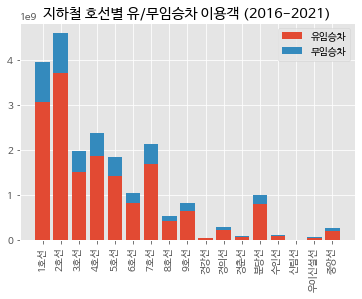

In [1000]:

# create data
plt.style.use('ggplot')




plt.title('지하철 호선별 유/무임승차 이용객 (2016-2021)')
# plot bars in stack manner
plt.bar(hosun, hodf_yoo,  label="유임승차")
plt.bar(hosun, hodf_moo, bottom=hodf_yoo, label="무임승차")


plt.legend(['유임승차', '무임승차'])
plt.xticks(rotation = 90)




plt.show()

In [1001]:
hoho=hodf[["무임승차비율","유임승차비율"]].round(1)
hoho

,무임승차비율,유임승차비율
호선명,,
1호선,22.346594,77.653406
2호선,18.992768,81.007232
3호선,22.993506,77.006494
4호선,21.523466,78.476534
5호선,22.580655,77.419345
6호선,22.489635,77.510365
7호선,21.286645,78.713355
8호선,23.169231,76.830769
9호선,19.9841,80.0159


In [1009]:
hodf3=hodf.drop(['무임승차비율', '유임승차비율'], axis=1)
hodf3

,0,1
호선명,,
1호선,3072775974.0,884263583.0
2호선,3715756076.0,871187547.0
3호선,1519238738.0,453632191.0
4호선,1870746379.0,513082634.0
5호선,1430004432.0,417084867.0
6호선,818610998.0,237520002.0
7호선,1684306876.0,455491233.0
8호선,419787367.0,126591864.0
9호선,655676329.0,163756216.0


Text(0.5, 1.0, '지하철 유/무임승차 이용객 연도별 추이 (2017-2021)')

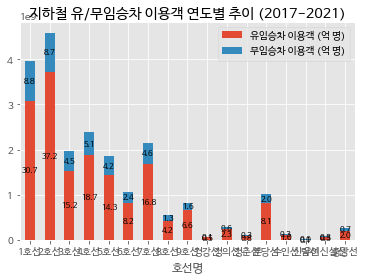

In [1036]:
ax = hodf3.plot.bar(stacked=True)

ax.set_xticklabels(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경의선', '경춘선', '분당선', '수인선', '신림선', '우이신설선', '중앙선'])

x = ['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경의선', '경춘선', '분당선', '수인선', '신림선', '우이신설선', '중앙선']


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height/100000000), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=8)
plt.xticks(rotation = 0)

plt.legend(['유임승차 이용객 (억 명)',"무임승차 이용객 (억 명)"], loc='upper right')
plt.title('지하철 유/무임승차 이용객 연도별 추이 (2017-2021)')



Text(0.5, 1.0, '지하철 호선별 유/무임승차 비율 (2017-2021)')

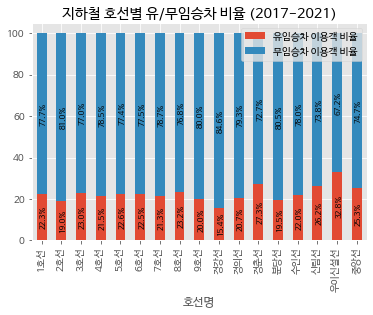

In [1026]:
ax = hoho.plot.bar(stacked=True)
ax.set_xticklabels(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경의선', '경춘선', '분당선', '수인선', '신림선', '우이신설선', '중앙선'])

x = ['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경의선', '경춘선', '분당선', '수인선', '신림선', '우이신설선', '중앙선']

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2+0.1, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            rotation = 90,
            fontsize=8)
plt.xticks(rotation = 90)

plt.legend(['유임승차 이용객 비율',"무임승차 이용객 비율"], loc='upper right')
plt.title('지하철 호선별 유/무임승차 비율 (2017-2021)')


**시각화종합**

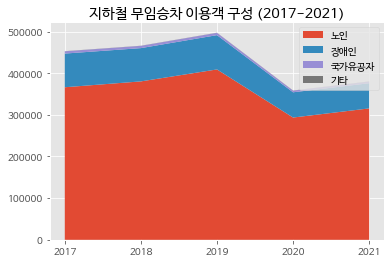

In [1088]:
# plot bars in stack manner
plt.style.use('ggplot')
x = ["2017", "2018", "2019", "2020", "2021"]
y1 = total
y2 = old
y3 = disabled
y4 = honored
y5 = others
y = np.vstack([y2, y3, y4,y5])

# plot
fig, ax = plt.subplots()

ax.stackplot(x, y)
# plt.annotate("annotate",(2.2,0.5))

plt.legend(('노인','장애인','국가유공자','기타'))
plt.title('지하철 무임승차 이용객 구성 (2017-2021)')



plt.show()

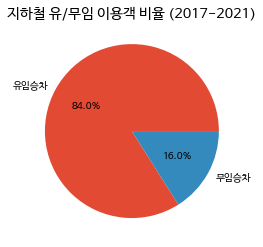

In [1089]:
y = np.array(listforpie)
mylabels = ["유임승차","무임승차"]
plt.title('지하철 유/무임 이용객 비율 (2017-2021)')
plt.pie(y, labels = mylabels, autopct='%1.1f%%')
plt.show() 

Text(0.5, 1.0, '지하철 유/무임승차 이용객 연도별 추이 (2017-2021)')

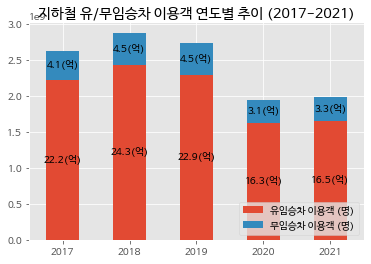

In [1090]:
ax = yearlyyoomoonewnew[["유임승차","무임승차"]].plot.bar(stacked=True)
ax.set_xticklabels(['2017', '2018',"2019","2020","2021"])

x = ['2017', '2018',"2019","2020","2021"]

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}(억)'.format(height/100000000), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.xticks(rotation = 0)

plt.legend(['유임승차 이용객 (명)',"무임승차 이용객 (명)"], loc='lower right')
plt.title('지하철 유/무임승차 이용객 연도별 추이 (2017-2021)')



Text(0.5, 1.0, '지하철 유/무임승차 이용객 비율 (2017-2021)')

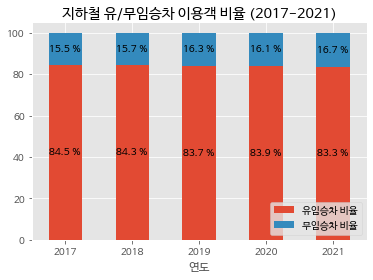

In [1091]:
ax = forplotting2.plot.bar(stacked=True)
x = ['2017', '2018',"2019","2020","2021"]

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f} %'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center')
plt.xticks(rotation = 0)
plt.legend(['유임승차 비율',"무임승차 비율"], loc='lower right')
plt.title('지하철 유/무임승차 이용객 비율 (2017-2021)')



Text(0.5, 1.0, '지하철 유/무임승차 이용객 연도별 추이 (2017-2021)')

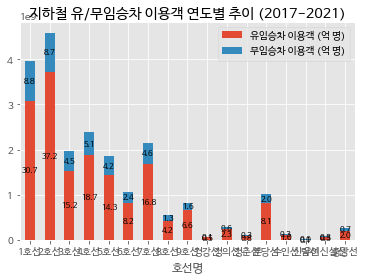

In [1092]:
ax = hodf3.plot.bar(stacked=True)

ax.set_xticklabels(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경의선', '경춘선', '분당선', '수인선', '신림선', '우이신설선', '중앙선'])

x = ['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경의선', '경춘선', '분당선', '수인선', '신림선', '우이신설선', '중앙선']


for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2, 
            y+height/2, 
            '{:.1f}'.format(height/100000000), 
            horizontalalignment='center', 
            verticalalignment='center',
            fontsize=8)
plt.xticks(rotation = 0)

plt.legend(['유임승차 이용객 (억 명)',"무임승차 이용객 (억 명)"], loc='upper right')
plt.title('지하철 유/무임승차 이용객 연도별 추이 (2017-2021)')



Text(0.5, 1.0, '지하철 호선별 유/무임승차 비율 (2017-2021)')

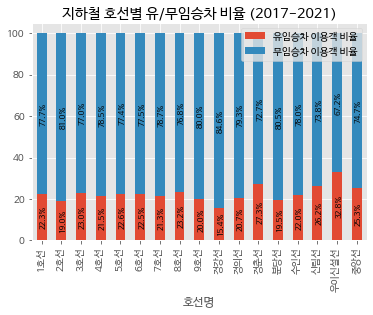

In [1093]:
ax = hoho.plot.bar(stacked=True)
ax.set_xticklabels(['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경의선', '경춘선', '분당선', '수인선', '신림선', '우이신설선', '중앙선'])

x = ['1호선', '2호선', '3호선', '4호선', '5호선', '6호선', '7호선', '8호선', '9호선', '경강선',
       '경의선', '경춘선', '분당선', '수인선', '신림선', '우이신설선', '중앙선']

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.text(x+width/2+0.1, 
            y+height/2, 
            '{:.1f}%'.format(height), 
            horizontalalignment='center', 
            verticalalignment='center',
            rotation = 90,
            fontsize=8)
plt.xticks(rotation = 90)

plt.legend(['유임승차 이용객 비율',"무임승차 이용객 비율"], loc='upper right')
plt.title('지하철 호선별 유/무임승차 비율 (2017-2021)')
